In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
train_data= pd.read_csv("train.csv")

In [84]:
train_data

Year      Status  Life expectancy  Adult Mortality  infant deaths  \
0     2008  Developing             61.4             29.0             11   
1     2015  Developing             61.8             33.0             27   
2     2007  Developing             78.9             93.0              1   
3     2002  Developing             59.3             33.0             19   
4     2002  Developing             47.7            473.0             65   
...    ...         ...              ...              ...            ...   
2127  2000   Developed             73.0            147.0              0   
2128  2008  Developing             75.8             76.0              0   
2129  2015  Developing             76.3            116.0              8   
2130  2007   Developed             78.1             11.0             27   
2131  2014  Developing             63.8            229.0             59   

        Alcohol  percentage expenditure  Hepatitis B  Measles        BMI   \
0      0.810000              103.727773         59.0         0  43.400000   
1           NaN                0.000000          9.0         9  23.400000   
2      4.200000              150.889148         89.0         0  52.400000   
3      6.100000               50.285582          NaN         0  35.600000   
4      3.130000                0.000000         48.0      5882   2.400000   
...         ...                     ...          ...       ...        ...   
2127  11.060000                0.000000         98.0         0   5.700000   
2128   2.000000              231.547891         97.0         2  58.500000   
2129   4.581316                0.000000         94.0         0  62.800000   
2130   8.740000                0.000000         93.0        43  65.100000   
2131   0.010000              253.608651         94.0       676  38.782616   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  \
0     ...   76.0           4.600000         63.0        1.3   1178.724690   
1     ...    9.0                NaN          9.0        4.1   1313.889646   
2     ...   89.0           8.370000         89.0        0.1    612.623418   
3     ...   54.0           5.470000         48.0        4.8    393.163270   
4     ...    7.0           4.470000         64.0        6.9           NaN   
...   ...    ...                ...          ...        ...           ...   
2127  ...   98.0           5.500000         99.0        0.1  11118.214921   
2128  ...   97.0           3.170000         97.0        0.1   2367.565350   
2129  ...   93.0           5.990112         94.0        0.1  13467.123600   
2130  ...   93.0          15.570000         96.0        0.1  11118.214921   
2131  ...   94.0           8.430000         94.0        0.3   2176.898290   

        Population   thinness  1-19 years   thinness 5-9 years  \
0     6.787187e+06               1.400000             1.300000   
1     1.615870e+05               6.300000             6.100000   
2     4.369469e+06               1.900000             1.900000   
3     8.834733e+06               4.600000             4.700000   
4              NaN               7.700000             7.700000   
...            ...                    ...                  ...   
2127  6.380060e+06               1.600000             1.700000   
2128  6.380060e+06               6.000000             5.900000   
2129  4.341776e+07               1.000000             0.900000   
2130  6.380060e+06               0.700000             0.600000   
2131  3.773791e+07               4.820415             4.806858   

      Income composition of resources  Schooling  
0                            0.469000   8.900000  
1                            0.576000  12.500000  
2                            0.734000  12.800000  
3                            0.444000   8.000000  
4                                 NaN        NaN  
...                               ...        ...  
2127                         0.761000  13.000000  
2128                         0.815000  14.400000  
212

year (Ordinal) - the calendar year the indicators are from #ranging from 2000 to 2015)

status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; nother #way to think of this is that the chance an individual ill die #between 15 and 60 is 26.3%

infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

alcohol (Ratio) - a country's alcohol consumption rate measured s #liters of pure alcohol consumption per capita

percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

measles (Ratio) - number of reported Measles cases per 1000 population

bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

under-five_deaths (Ratio) - number of people under the age of ive #deaths per 1000 population

polio (Ratio) - number of 1 year olds with Polio immunization ver #the number of all 1 year olds in population

total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis #DTP3) immunization rate of 1 year olds

hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

gdp (Ratio) - Gross Domestic Product per capita

population (Ratio) - population of a country

thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years o #more accurately represent the variable)

thinness_5-9_years (Ratio) - rate of thinness among people aged -9

income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

schooling (Ratio) - average number of years of schooling of a population

In [85]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2132 non-null   int64  
 1   Status                           2132 non-null   object 
 2   Life expectancy                  2125 non-null   float64
 3   Adult Mortality                  2125 non-null   float64
 4   infant deaths                    2132 non-null   int64  
 5   Alcohol                          2035 non-null   float64
 6   percentage expenditure           2132 non-null   float64
 7   Hepatitis B                      1850 non-null   float64
 8   Measles                          2132 non-null   int64  
 9    BMI                             2115 non-null   float64
 10  under-five deaths                2132 non-null   int64  
 11  Polio                            2124 non-null   float64
 12  Total expenditure   

# Data pre-processing

In [86]:

# Load the cleaned data
train_data= pd.read_csv("train.csv")
train_data.columns = [col.strip() for col in train_data.columns]

# Handling categorical data (one-hot encoding)
train_data = pd.get_dummies(train_data, columns=['Status'], drop_first=True)

# Handling missing values using mean imputation
train_data['Life expectancy'].fillna(train_data['Life expectancy'].mean(), inplace=True)
train_data['Adult Mortality'].fillna(train_data['Adult Mortality'].mean(), inplace=True)
train_data['Alcohol'].fillna(train_data['Alcohol'].mean(), inplace=True)
train_data['Hepatitis B'].fillna(train_data['Hepatitis B'].mean(), inplace=True)
train_data['BMI'].fillna(train_data['BMI'].mean(), inplace=True)
train_data['Polio'].fillna(train_data['Polio'].mean(), inplace=True)
train_data['Total expenditure'].fillna(train_data['Total expenditure'].mean(), inplace=True)
train_data['Diphtheria'].fillna(train_data['Diphtheria'].mean(), inplace=True)
train_data['GDP'].fillna(train_data['GDP'].mean(), inplace=True)
train_data['Population'].fillna(train_data['Population'].mean(), inplace=True)
train_data['thinness  1-19 years'].fillna(train_data['thinness  1-19 years'].mean(), inplace=True)
train_data['thinness 5-9 years'].fillna(train_data['thinness 5-9 years'].mean(), inplace=True)
train_data['Income composition of resources'].fillna(train_data['Income composition of resources'].mean(), inplace=True)
train_data['Schooling'].fillna(train_data['Schooling'].mean(), inplace=True)

# Feature selection
selected_features = ['Year', 'Status_Developing', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']

X = train_data[selected_features]
y = train_data['Life expectancy']




# data exploration 

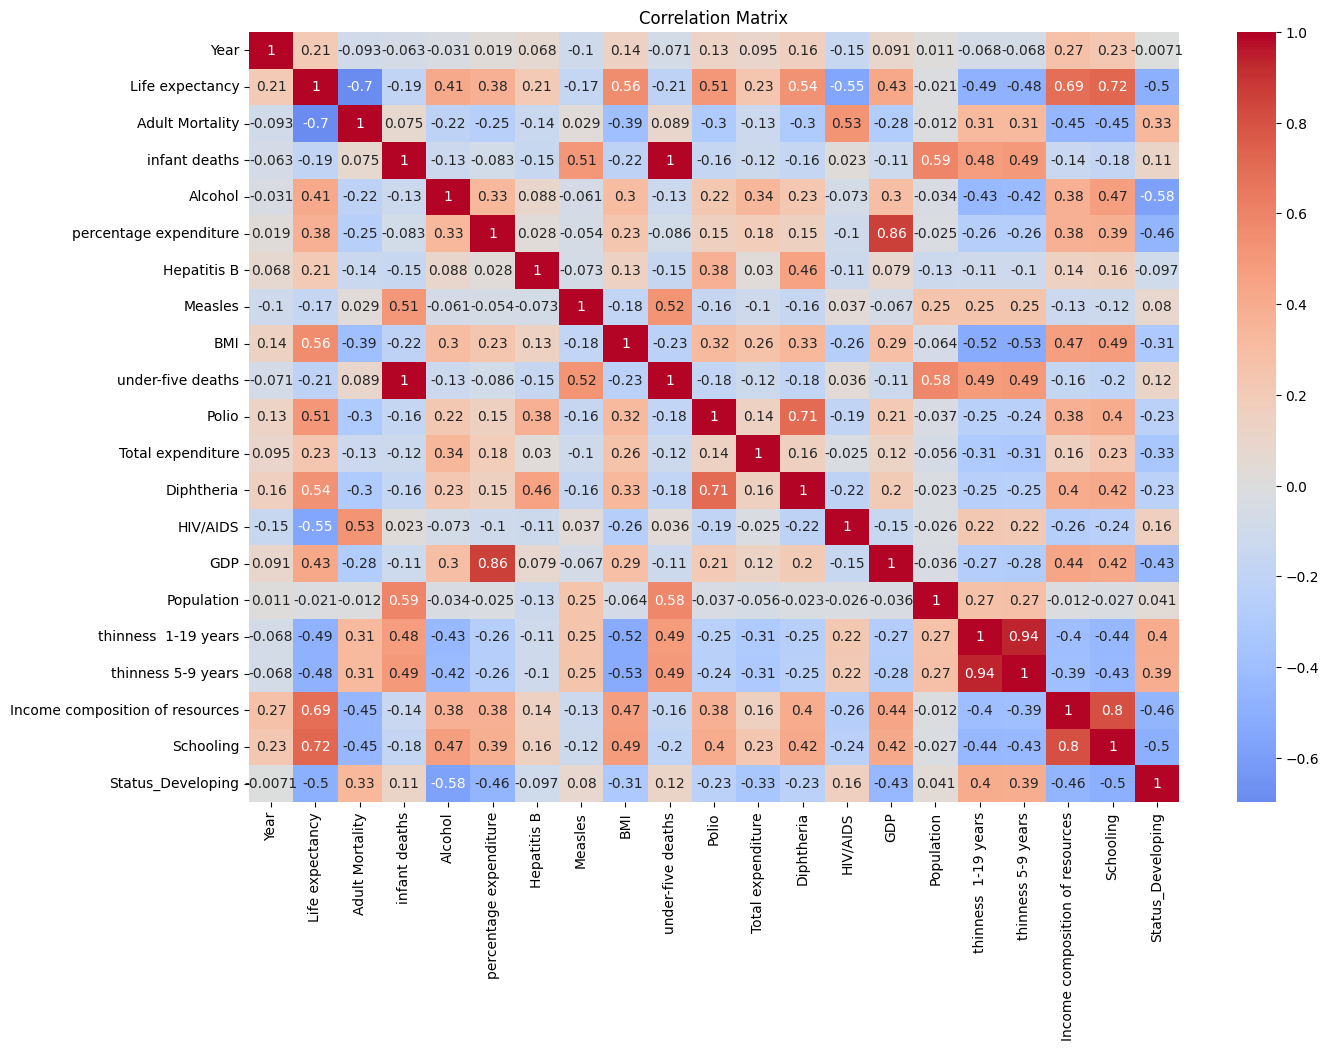

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
# train_data = pd.read_csv('cleaned_train_data.csv')

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

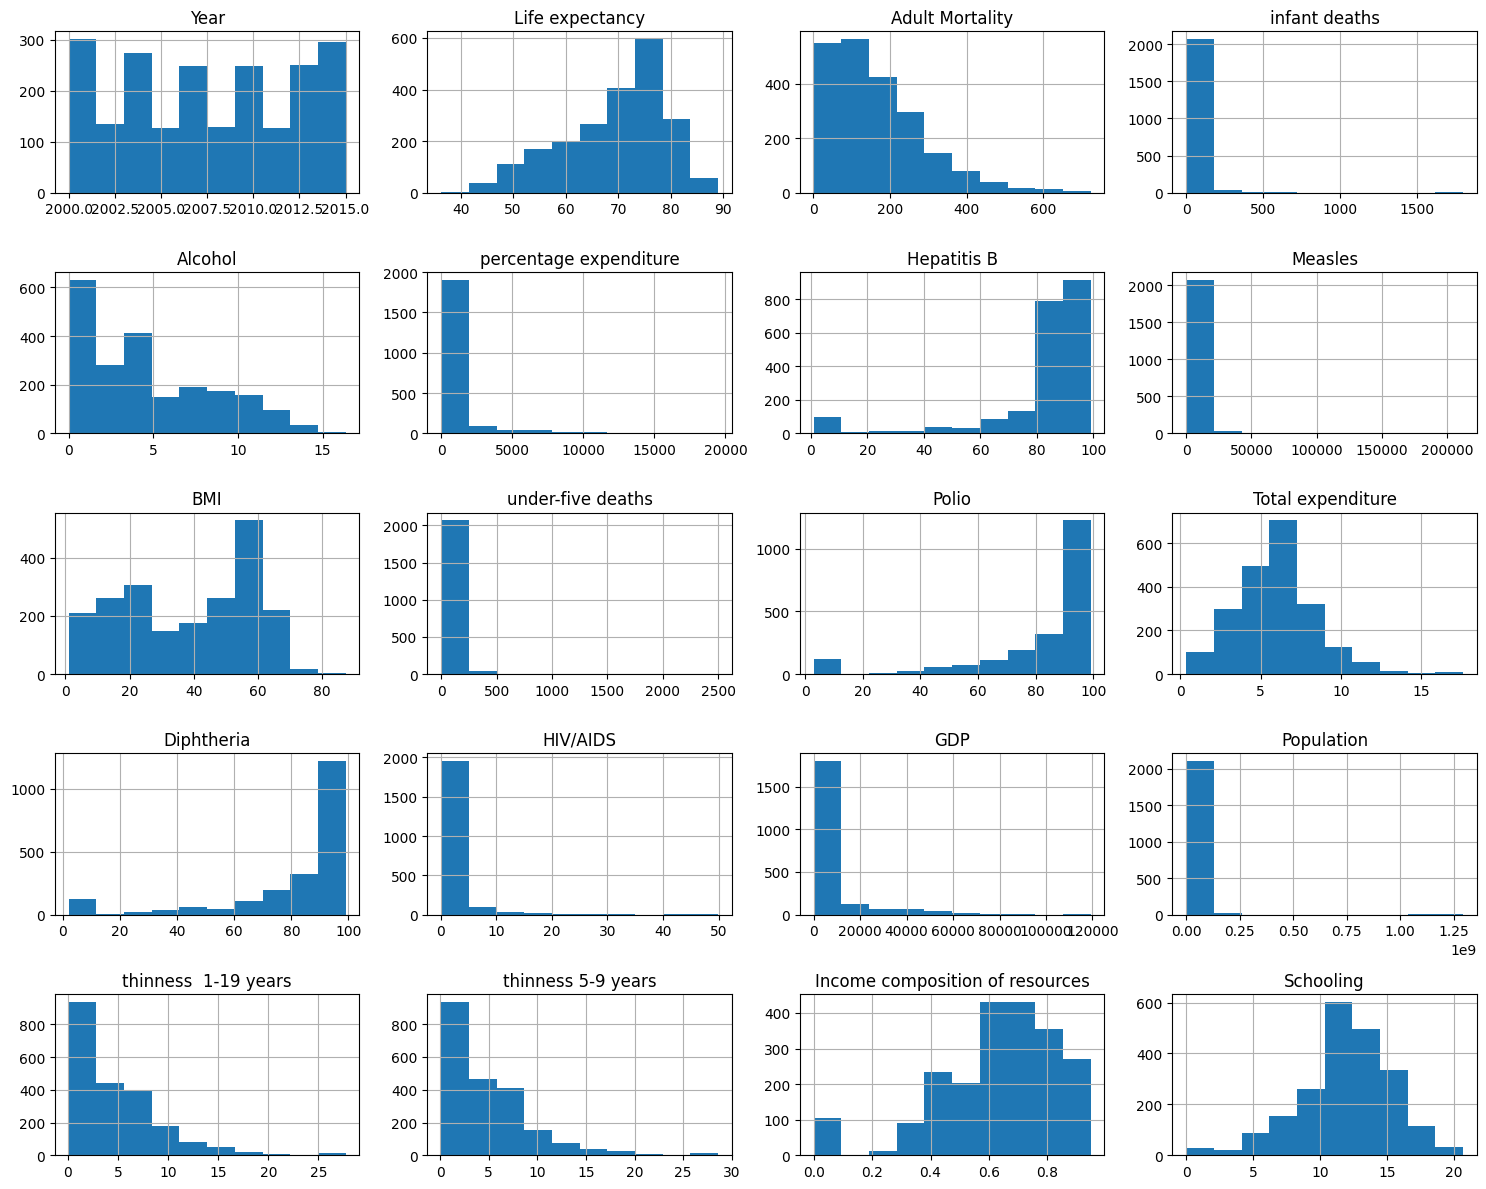

In [88]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
train_data.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


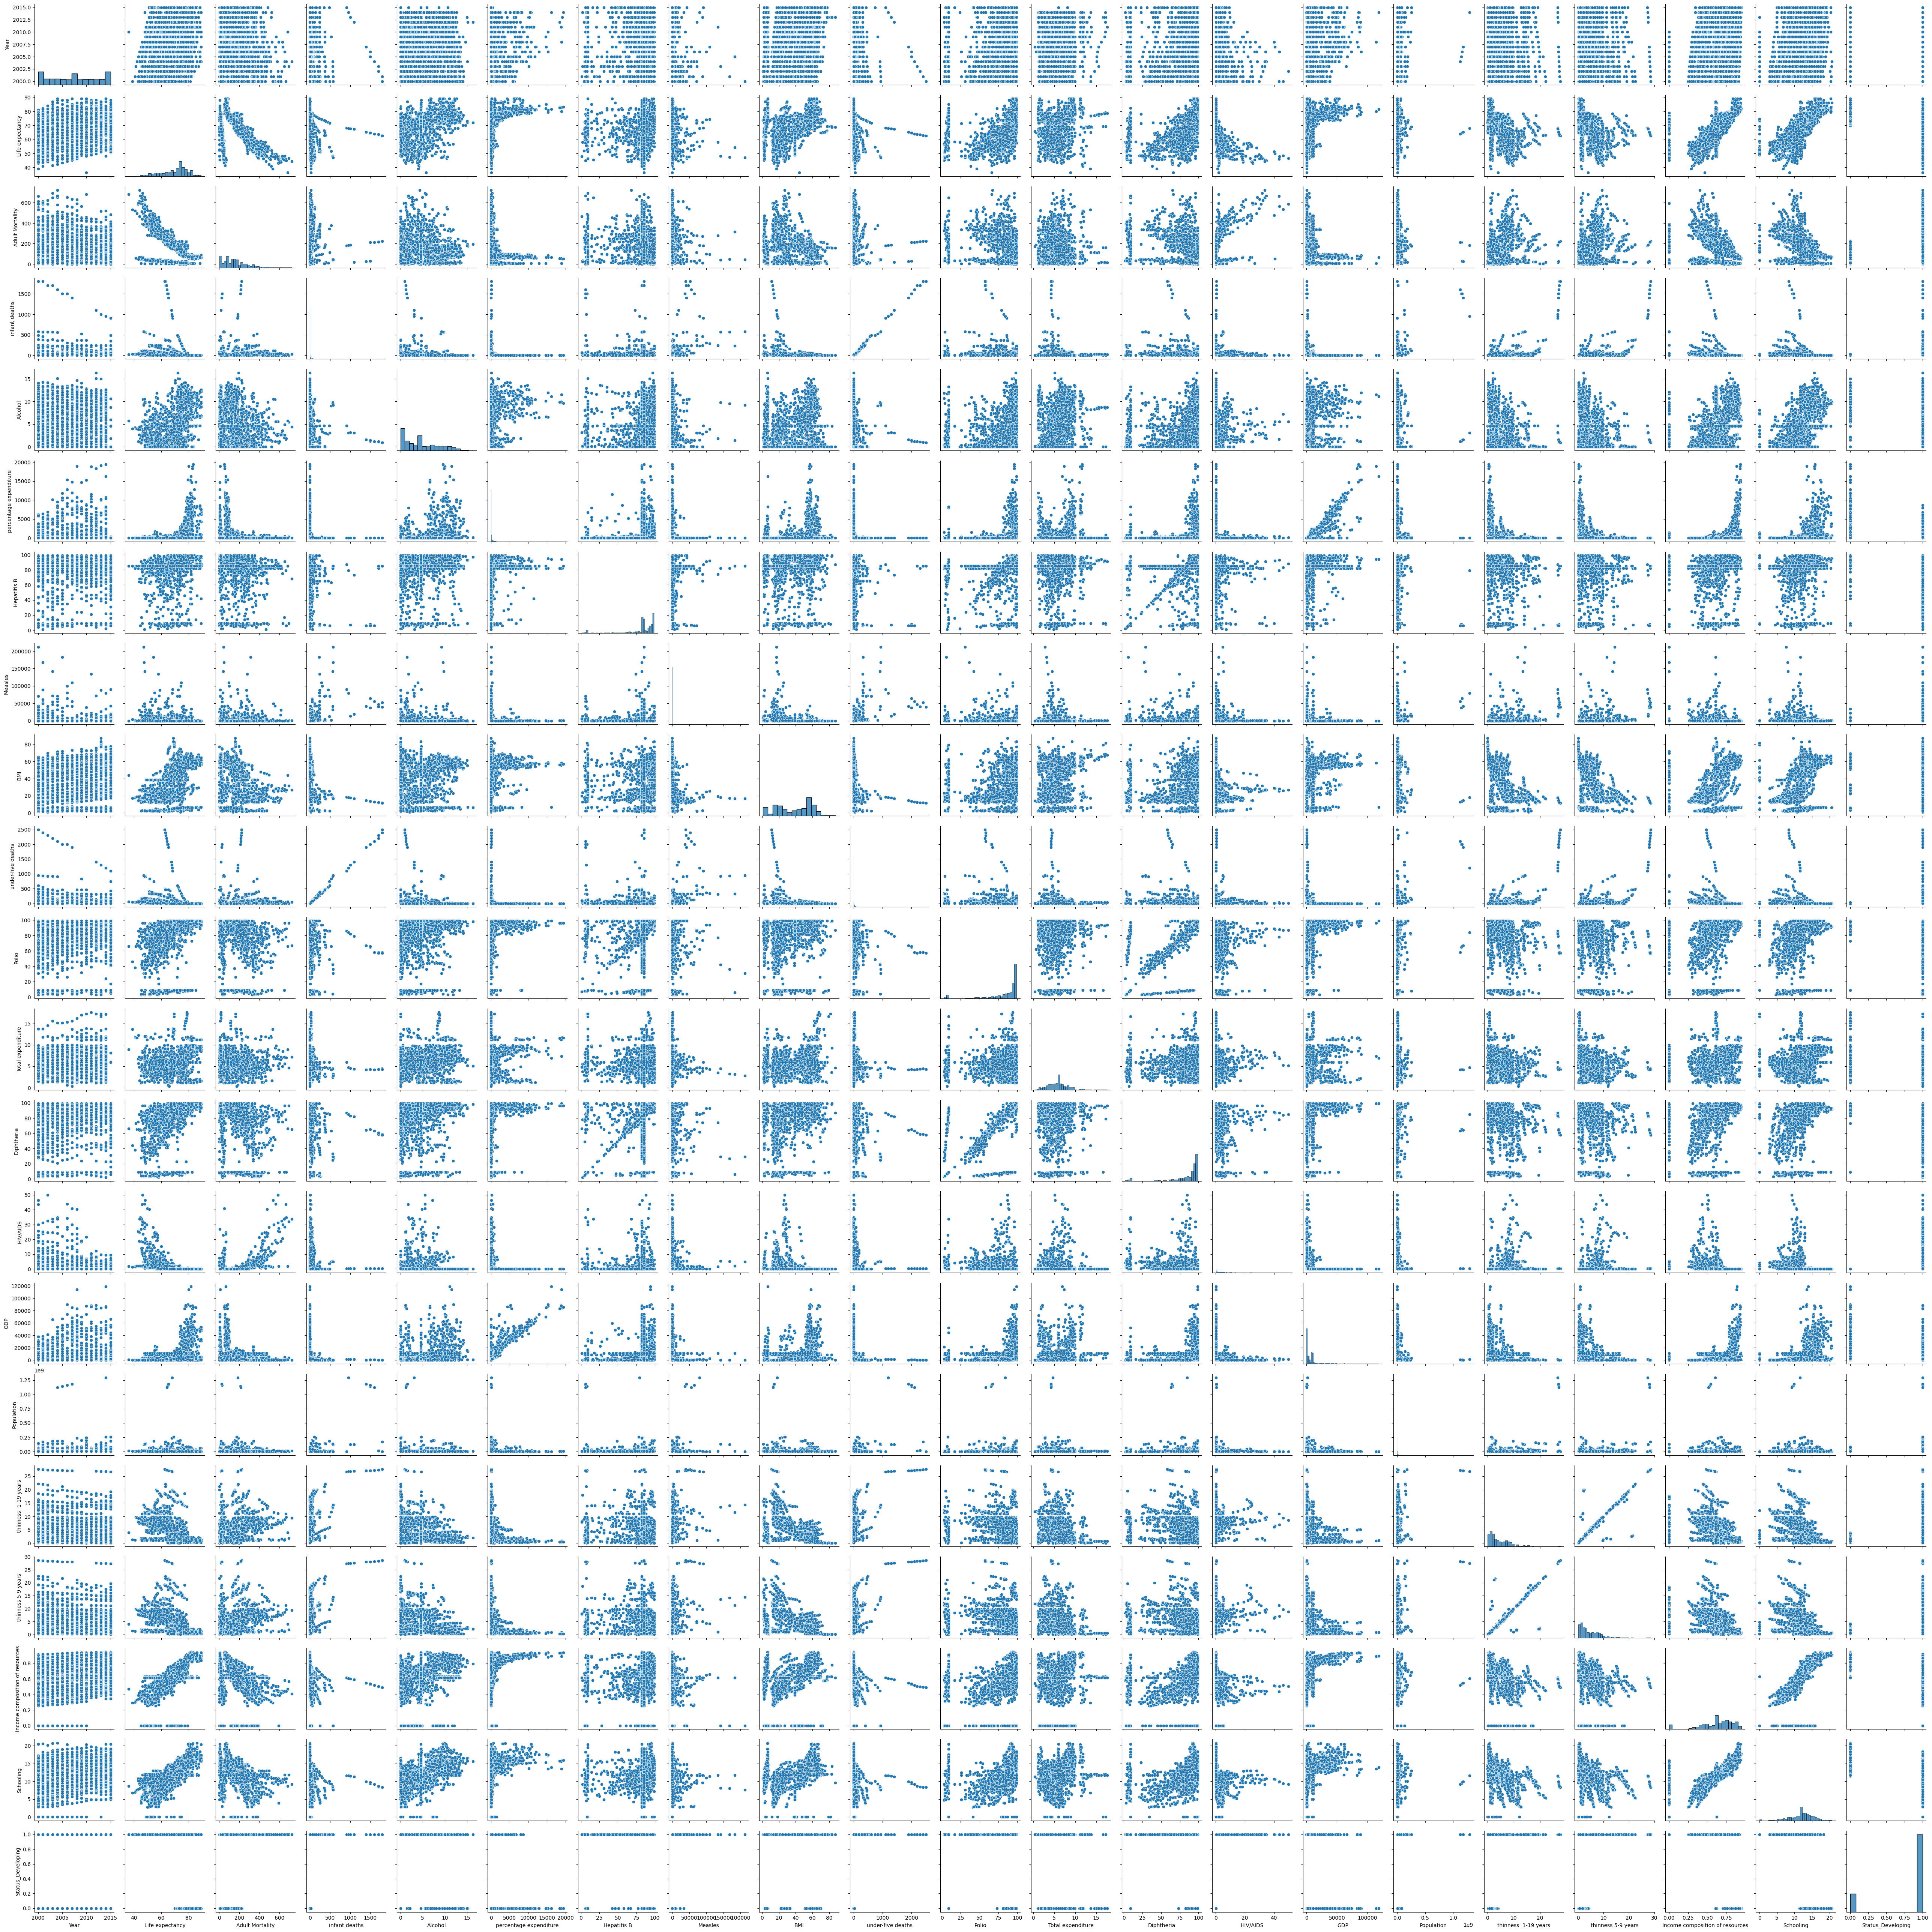

In [89]:
# Plot pair plots
sns.pairplot(train_data)
plt.show()


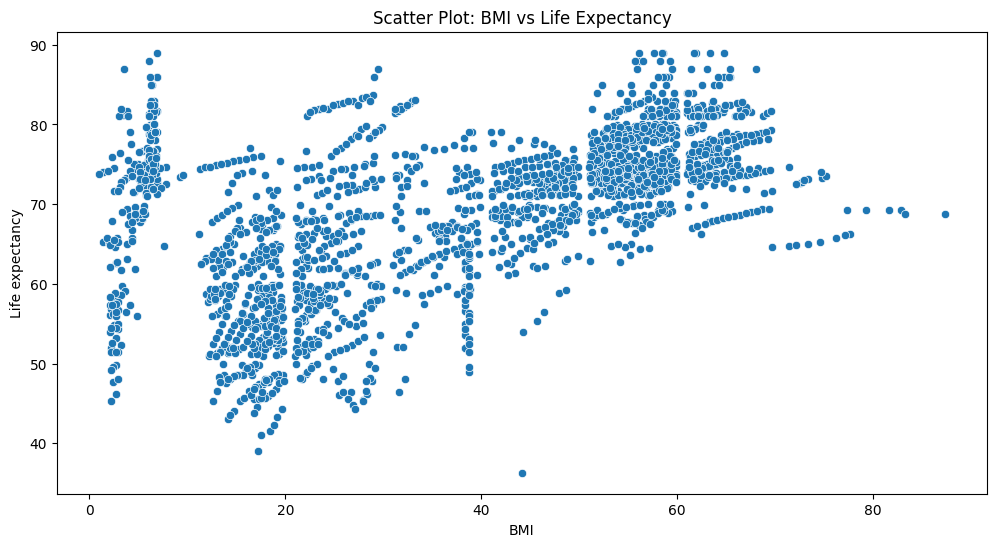

In [90]:
# Plot scatter plots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BMI', y='Life expectancy', data=train_data)
plt.title("Scatter Plot: BMI vs Life Expectancy")
plt.show()


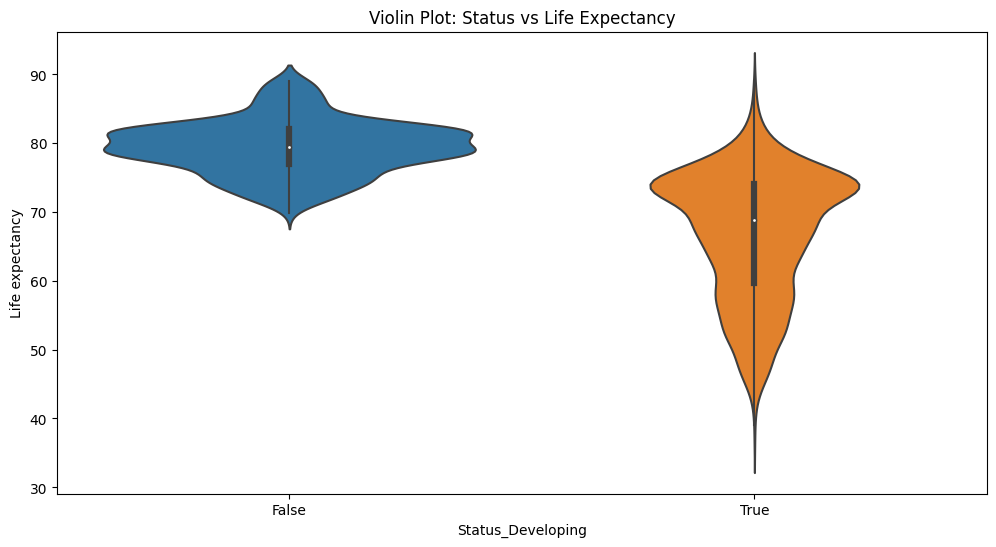

In [91]:
# Plot violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='Status_Developing', y='Life expectancy', data=train_data)
plt.title("Violin Plot: Status vs Life Expectancy")
plt.show()


# Using SVM

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=90)

# Handling missing values (if any)
# You can impute missing values in X_train and X_test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Model evaluationa
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (SVM): {rmse}")


Root Mean Squared Error (SVM): 3.075133544512758


# Using random forest

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=90)

# Handling missing values (if any)
# You can impute missing values in X_train and X_test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (Random Forest): {rmse}")


Root Mean Squared Error (Random Forest): 2.348201246694895


# SVM + REGULARIZATION

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=90)

# Handling missing values (if any)
# You can impute missing values in X_train and X_test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV with L2 regularization
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  # Add gamma parameter for rbf and poly kernels
    'degree': [2, 3, 4]  # Add degree parameter for poly kernel
}

svm_model = SVR(kernel='linear')  # Start with linear kernel
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (SVM with L2): {rmse}")



Root Mean Squared Error (SVM with L2): 3.075133544512758


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=90)

# Handling missing values (if any)
# You can impute missing values in X_train and X_test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
n_components = 10  # Specify the number of components you want after PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (SVM with PCA): {rmse}")


Root Mean Squared Error (SVM with PCA): 3.4256158667750998


# Choose the best method, and predict using Test dataset 


## use random forest

### then, we run the algo on train set

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load the cleaned data
train_data = pd.read_csv('train.csv')
train_data.columns = [col.strip() for col in train_data.columns]

# Handling categorical data (one-hot encoding)
train_data = pd.get_dummies(train_data, columns=['Status'], drop_first=True)

# Handling missing values using mean imputation
train_data['Life expectancy'].fillna(train_data['Life expectancy'].mean(), inplace=True)
train_data['Adult Mortality'].fillna(train_data['Adult Mortality'].mean(), inplace=True)
train_data['Alcohol'].fillna(train_data['Alcohol'].mean(), inplace=True)
train_data['Hepatitis B'].fillna(train_data['Hepatitis B'].mean(), inplace=True)
train_data['BMI'].fillna(train_data['BMI'].mean(), inplace=True)
train_data['Polio'].fillna(train_data['Polio'].mean(), inplace=True)
train_data['Total expenditure'].fillna(train_data['Total expenditure'].mean(), inplace=True)
train_data['Diphtheria'].fillna(train_data['Diphtheria'].mean(), inplace=True)
train_data['GDP'].fillna(train_data['GDP'].mean(), inplace=True)
train_data['Population'].fillna(train_data['Population'].mean(), inplace=True)
train_data['thinness  1-19 years'].fillna(train_data['thinness  1-19 years'].mean(), inplace=True)
train_data['thinness 5-9 years'].fillna(train_data['thinness 5-9 years'].mean(), inplace=True)
train_data['Income composition of resources'].fillna(train_data['Income composition of resources'].mean(), inplace=True)
train_data['Schooling'].fillna(train_data['Schooling'].mean(), inplace=True)

# Feature selection
selected_features = ['Year', 'Status_Developing', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']

X_train = train_data[selected_features]
y_train = train_data['Life expectancy']


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test_scaled)

### then, we clean the test data

In [123]:
# Load the cleaned data
test_data= pd.read_csv("test.csv")
test_data.columns = [col.strip() for col in test_data.columns]

# Handling categorical data (one-hot encoding)
test_data = pd.get_dummies(test_data, columns=['Status'], drop_first=True)

# Handling missing values using mean imputation

test_data['Adult Mortality'].fillna(test_data['Adult Mortality'].mean(), inplace=True)
test_data['Alcohol'].fillna(test_data['Alcohol'].mean(), inplace=True)
test_data['Hepatitis B'].fillna(test_data['Hepatitis B'].mean(), inplace=True)
test_data['BMI'].fillna(test_data['BMI'].mean(), inplace=True)
test_data['Polio'].fillna(test_data['Polio'].mean(), inplace=True)
test_data['Total expenditure'].fillna(test_data['Total expenditure'].mean(), inplace=True)
test_data['Diphtheria'].fillna(test_data['Diphtheria'].mean(), inplace=True)
test_data['GDP'].fillna(test_data['GDP'].mean(), inplace=True)
test_data['Population'].fillna(test_data['Population'].mean(), inplace=True)
test_data['thinness  1-19 years'].fillna(test_data['thinness  1-19 years'].mean(), inplace=True)
test_data['thinness 5-9 years'].fillna(test_data['thinness 5-9 years'].mean(), inplace=True)
test_data['Income composition of resources'].fillna(test_data['Income composition of resources'].mean(), inplace=True)
test_data['Schooling'].fillna(test_data['Schooling'].mean(), inplace=True)

# Feature selection
selected_features = ['Year', 'Status_Developing', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']

X_test= test_data[selected_features]
X_test_scaled = scaler.transform(X_test)



### Now we apply onto the test data

In [124]:
# Model evaluation
y_pred = best_model.predict(X_test_scaled)

In [125]:
#Turn to dataframe
result_df = pd.DataFrame({"id": test_data["id"].reset_index(drop=True), "Life expectancy": y_pred})


In [126]:
#Export
result_df.to_csv("result_prediction1.csv")